# Introduction

In [1]:
"""
What? Plot Hierarchical Clustering Dendrogram

This example plots the corresponding dendrogram of a hierarchical clustering using AgglomerativeClustering 
and the dendrogram method available in scipy.

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
           https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram
           https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
"""

'\nWhat? Plot Hierarchical Clustering Dendrogram\n\n\n\nRevision No: 1\nLast revised: 08/02/21\nReference: \nGLM \n'

# Import modules

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from matplotlib import rcParams

# Load dataset

In [10]:
iris = load_iris()
X = iris.data

# Agglomerative clustering

In [ ]:
"""
Agglomerative Clustering: recursively merges the pair of clusters that minimally increases a given linkage distance.
"""

In [11]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Fitting the model
model = model.fit(X)

In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

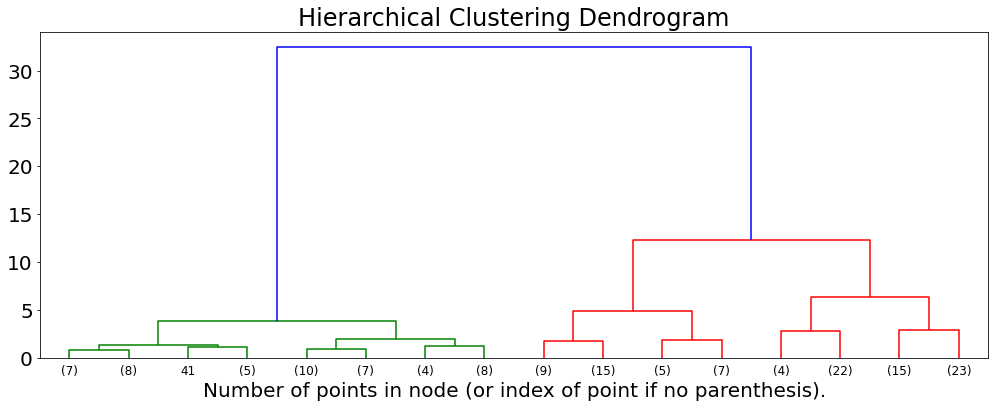

In [13]:
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 17, 6
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
"""
The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster
and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also
the cophenetic distance between original observations in the two children clusters.
"""